<a href="https://colab.research.google.com/github/aaditkamat/analytics-projects/blob/main/World_Happiness_Report_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
happiness_df = pd.read_csv('world_happiness.csv')
happiness_df.head(6)

,Country name,Region,Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
5,Netherlands,Western Europe,7.4489,10.812712,0.939139,72.300919,0.908548,0.207612,0.364717


In [3]:
happiness_df['Region'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [4]:
avg_hap_score = happiness_df['Score'].mean()
print(f'The average score of world happiness is: {avg_hap_score}')

The average score of world happiness is: 5.473239862849674


In [8]:
avg_hap_score_by_region = happiness_df.groupby('Region')['Score'].mean()
avg_df = avg_hap_score_by_region.reset_index()
avg_df.loc[avg_df['Score'] < avg_hap_score, :]

,Region,Score
1,Commonwealth of Independent States,5.358342
4,Middle East and North Africa,5.227159
6,South Asia,4.475443
7,Southeast Asia,5.383367
8,Sub-Saharan Africa,4.383495


In [10]:
numeric_hap_score = happiness_df.iloc[:, 2:]
numeric_hap_score.corr()

,Score,GDP,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.775374,0.765001,0.770316,0.590597,0.069043,-0.418305
GDP,0.775374,1.000000,0.781814,0.848469,0.419019,-0.118399,-0.334729
Social support,0.765001,0.781814,1.000000,0.742744,0.478863,-0.056780,-0.210530
Healthy life expectancy,0.770316,0.848469,0.742744,1.000000,0.448846,-0.071852,-0.353841
Freedom to make life choices,0.590597,0.419019,0.478863,0.448846,1.000000,0.253721,-0.420145
Generosity,0.069043,-0.118399,-0.056780,-0.071852,0.253721,1.000000,-0.278480
Perceptions of corruption,-0.418305,-0.334729,-0.210530,-0.353841,-0.420145,-0.278480,1.000000


GDP is the feature most correlated with the happiness score

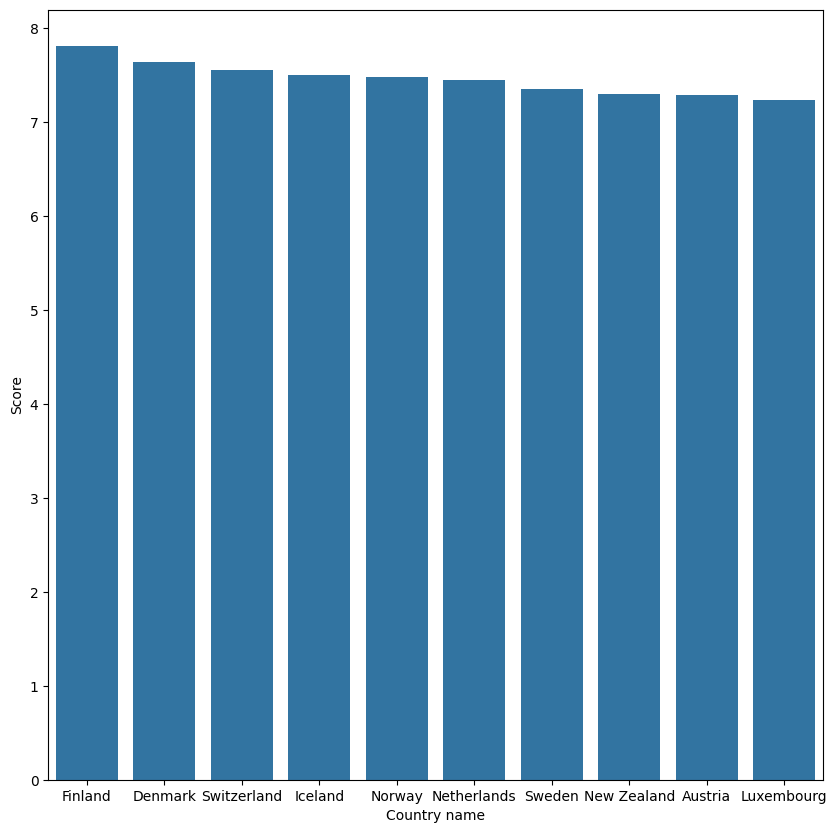

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(happiness_df.iloc[: 10, :], x='Country name', y='Score', ax=ax)
plt.show()